#### What is lassso regression?
1. Lasso regression, or Least Absolute Shrinkage and Selection Operator, is a type of linear regression that performs both variable selection and regularization to enhance prediction accuracy and interpretability
2. It achieves this by applying a penalty (regularization) to the size of the regression coefficients, effectively shrinking some of them to zero.
3. This allows lasso to be useful in scenarios where we want a model that uses fewer predictors.



#### How it Works?
1. In a regular linear regression, we minimize the sum of squared errors between predicted and actual values
2. However, in lasso regression, we modify this by adding a penalty term, which is the sum of the absolute values of the coefficients.
3. This penalty is controlled by a hyperparameter, usually denoted as λ. As λ increases, more coefficients are shrunk toward zero, leading to simpler models.
4.  If λ is large enough, some coefficients can become exactly zero, which means lasso can also perform feature selection by effectively removing some features.

#### The objective function for lasso regression is:
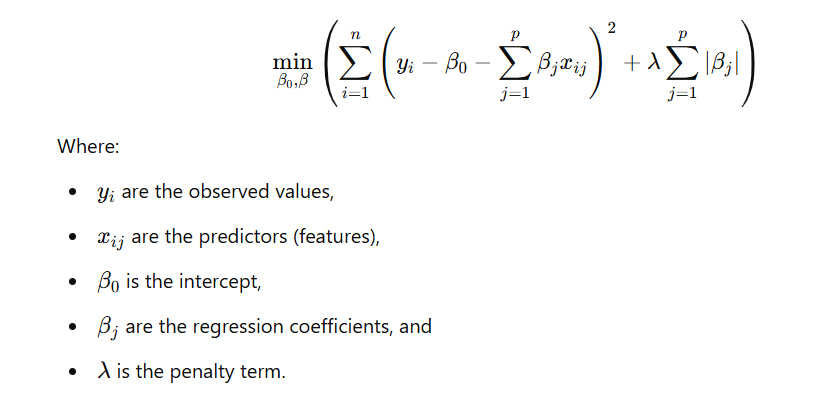

#### Example
Imagine you're trying to predict the price of a house based on several features such as square footage, number of bedrooms, number of bathrooms, location, and the year the house was built. You collect data from 100 houses and decide to fit a regression model.

Without regularization, your model might include all features, even if some don't contribute much to the prediction. Lasso regression, on the other hand, can shrink the coefficients of less important features toward zero.

Let’s say you have 5 features:
1. Square footage
2. Number of bedrooms
3. Number of bathrooms
4. Location (encoded as a numerical variable)
5. Year built

After applying lasso regression with a suitable value of λ, you might find that only "square footage," "location," and "year built" have non-zero coefficients, while "number of bedrooms" and "number of bathrooms" have been reduced to zero. This means the model considers these two features less relevant for predicting house prices and effectively removes them from the model.

#### sum of the absolute values of the coefficients.
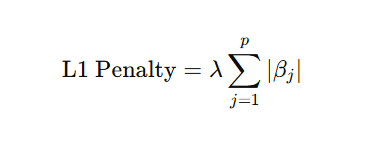
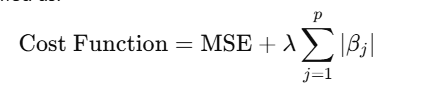

#### Implementing Lasso regression using Python and scikit-learn

Mean Squared Error: 91360381.83
Coefficients:
         Feature  Coefficient
0  SquareFootage   302.242661
1       Bedrooms     0.000000
2      Bathrooms     0.000000
3       Location  8740.609068
4      YearBuilt  4905.145698


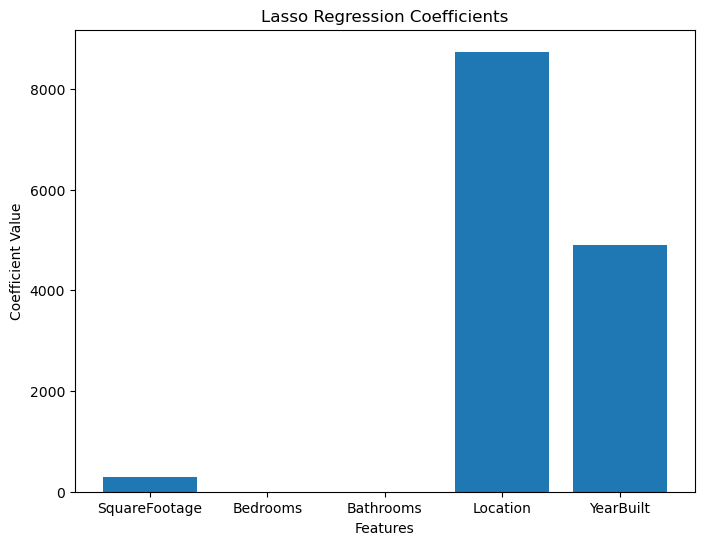

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Simulating a dataset
np.random.seed(42)

# Features (5 features for houses)
n = 100  # number of samples
X = pd.DataFrame({
    'SquareFootage': np.random.normal(2000, 500, n),
    'Bedrooms': np.random.randint(1, 6, n),
    'Bathrooms': np.random.randint(1, 4, n),
    'Location': np.random.randint(1, 10, n),
    'YearBuilt': np.random.randint(1970, 2020, n)
})

# Simulating the target variable (house prices)
# Assuming only 'SquareFootage', 'Location', and 'YearBuilt' matter
y = (300 * X['SquareFootage'] + 
     10000 * X['Location'] +
     5000 * (X['YearBuilt'] - 1970) +
     np.random.normal(0, 10000, n))  # Adding some noise

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Lasso regression model
lasso = Lasso(alpha=10000)  # alpha is the regularization parameter (lambda)
lasso.fit(X_train, y_train)

# Predicting on test set
y_pred = lasso.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Displaying the coefficients
print("Coefficients:")
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})
print(coefficients)

# Visualizing the coefficient shrinkage
plt.figure(figsize=(8, 6))
plt.bar(X.columns, lasso.coef_)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Lasso Regression Coefficients')
plt.show()
